In [2]:
import yfinance as yf
import pandas as pd

# 코카콜라(KO) 주식 데이터 다운로드
ticker = "KO"
start_date = "2014-06-01"
end_date = "2024-06-28"

# 데이터 다운로드 (일봉)
data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

# 필요한 열만 선택 (고가, 저가, 종가, 거래량)
data = data[['High', 'Low', 'Close', 'Volume']]

# 결측치 (NaN 값) 체크
nan_values = data.isna().sum()
print("결측치 (NaN 값) 체크:\n", nan_values)

# 0값 체크
zero_values = (data == 0).sum()
print("0값 체크:\n", zero_values)


[*********************100%%**********************]  1 of 1 completed

결측치 (NaN 값) 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64
0값 체크:
 High      0
Low       0
Close     0
Volume    0
dtype: int64


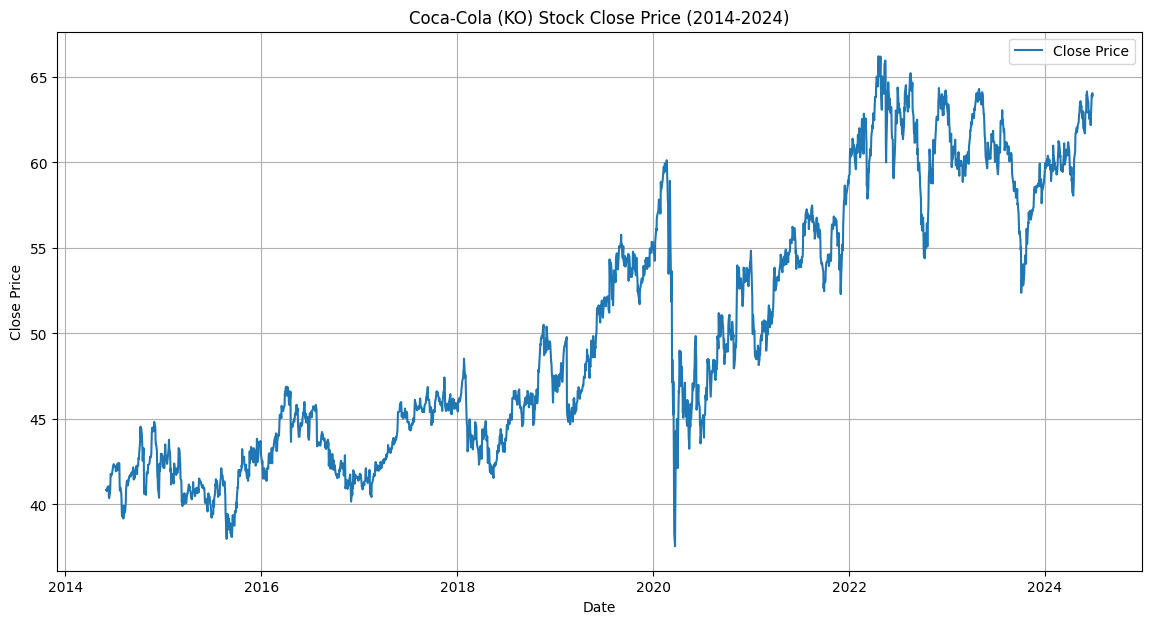

In [3]:
import matplotlib.pyplot as plt

# 종가 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Coca-Cola (KO) Stock Close Price (2014-2024)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import pandas as pd

# 종가의 변화량 계산
delta = data['Close'].diff()

# RSI 계산
period = 14
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=period, min_periods=1).mean()
avg_loss = loss.rolling(window=period, min_periods=1).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD 계산
short_period = 12
long_period = 26
signal_period = 9
ema_short = data['Close'].ewm(span=short_period, adjust=False).mean()
ema_long = data['Close'].ewm(span=long_period, adjust=False).mean()
data['MACD'] = ema_short - ema_long
data['Signal'] = data['MACD'].ewm(span=signal_period, adjust=False).mean()
data['MACD_Hist'] = data['MACD'] - data['Signal']

# 볼린저밴드 계산
band_period = 20
std_dev = 2
data['Middle_Band'] = data['Close'].rolling(window=band_period).mean()
data['Std_Dev'] = data['Close'].rolling(window=band_period).std()
data['Upper_Band'] = data['Middle_Band'] + (data['Std_Dev'] * std_dev)
data['Lower_Band'] = data['Middle_Band'] - (data['Std_Dev'] * std_dev)
data.drop(columns=['Std_Dev'], inplace=True)

# 결과 확인
print(data.head())


                 High        Low      Close    Volume         RSI      MACD  \
Date                                                                          
2014-06-02  40.889999  40.680000  40.860001   7472100         NaN  0.000000   
2014-06-03  41.000000  40.709999  40.880001  10493100  100.000000  0.001595   
2014-06-04  40.919998  40.709999  40.790001   7864700   18.182133 -0.004352   
2014-06-05  41.000000  40.630001  40.889999  10131700   57.142598 -0.000985   
2014-06-06  41.060001  40.840000  40.990002   8760600   70.967821  0.009641   

              Signal  MACD_Hist  Middle_Band  Upper_Band  Lower_Band  
Date                                                                  
2014-06-02  0.000000   0.000000          NaN         NaN         NaN  
2014-06-03  0.000319   0.001276          NaN         NaN         NaN  
2014-06-04 -0.000615  -0.003737          NaN         NaN         NaN  
2014-06-05 -0.000689  -0.000296          NaN         NaN         NaN  
2014-06-06  0.001377

<ipython-input-4-1f9c3af90296>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = 100 - (100 / (1 + rs))


In [5]:
import pandas as pd

# 사용하고자 하는 컬럼만 선택
data = data[['Close', 'Volume', 'RSI', 'MACD', 'Signal', 'MACD_Hist', 'Upper_Band', 'Middle_Band', 'Lower_Band']]

# 2014년 6월 28일 전의 데이터 삭제
data = data[data.index >= '2014-06-28']

# CSV 파일로 저장
file_path = '/content/drive/MyDrive/Colab Notebooks/data/코카콜라주가데이터.csv'
data.to_csv(file_path)

# 저장된 데이터 확인
print(f"데이터가 성공적으로 저장되었습니다: {file_path}")


데이터가 성공적으로 저장되었습니다: /content/drive/MyDrive/Colab Notebooks/data/코카콜라주가데이터.csv


In [6]:
import pandas as pd

# CSV 파일 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/data/코카콜라주가데이터.csv'
data = pd.read_csv(file_path, index_col=0)

# 결측치 (NaN 값) 체크
nan_values = data.isna().sum()
print("결측치 (NaN 값) 체크:\n", nan_values)

# 0값 체크
zero_values = (data == 0).sum()
print("0값 체크:\n", zero_values)


결측치 (NaN 값) 체크:
 Close          0
Volume         0
RSI            0
MACD           0
Signal         0
MACD_Hist      0
Upper_Band     0
Middle_Band    0
Lower_Band     0
dtype: int64
0값 체크:
 Close          0
Volume         0
RSI            0
MACD           0
Signal         0
MACD_Hist      0
Upper_Band     0
Middle_Band    0
Lower_Band     0
dtype: int64
